In [3]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt


In [11]:
def treinar_modelo(env, num_passos_treinamento, veses):
    """Treina o modelo usando PPO com o número de passos especificado."""
    model = PPO("MlpPolicy", env, verbose=1)
    rewards = []
    iterations = []

    for i in range(veses):
        # Treinamento do modelo com o número de passos especificado
        model.learn(total_timesteps=num_passos_treinamento)

        # Avaliação do modelo
        mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)

        # Armazenamento das recompensas e iterações
        rewards.append(mean_reward)
        iterations.append((i + 1) * num_passos_treinamento)
        print(f"Iteração {i+1}: Recompensa média = {mean_reward}")

    return rewards, iterations

def plotar_grafico_linha(iterations, rewards):
    """Plota um gráfico de linha das recompensas médias."""
    plt.plot(iterations, rewards)
    plt.xlabel('Iterações')
    plt.ylabel('Recompensa média')
    plt.show()


In [14]:
# Criação do ambiente
env = gym.make('CartPole-v1')
env = DummyVecEnv([lambda: env])

# Definindo o número de passos de treinamento desejados
num_passos_treinamento = 1994
veses = 5

# Treinamento do modelo
rewards, iterations = treinar_modelo(env, num_passos_treinamento, veses)

Using cuda device
-----------------------------
| time/              |      |
|    fps             | 333  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 2048 |
-----------------------------
Iteração 1: Recompensa média = 184.2
-----------------------------
| time/              |      |
|    fps             | 353  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
Iteração 2: Recompensa média = 243.0
-----------------------------
| time/              |      |
|    fps             | 352  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
Iteração 3: Recompensa média = 401.5
-----------------------------
| time/              |      |
|    fps             | 346  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
Iteração 4: Recompensa média = 

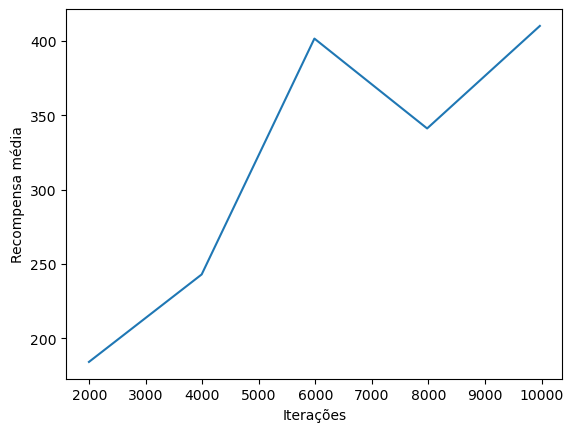

In [15]:
# Plotagem do gráfico de barras
plotar_grafico_linha(iterations, rewards)